<a href="https://colab.research.google.com/github/mveiyo/mveiyo/blob/main/Copy_of_Denoising_Dirty_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data from Kaggle

In [ ]:
!rm -rf data
!rm -rf data/train
!rm -rf data/test

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 0
cat: /root/.kaggle/kaggle.json: No such file or directory


In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 72.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 21.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for lxml
ERROR: Could not build wheels for lxml, which is required to install pyproject.toml-based projects


In [ ]:
!kaggle competitions list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Download dataset
!mkdir -p data
!kaggle competitions download -c denoising-dirty-documents -p data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Unzip dataset
!unzip data/test.zip -d data
!unzip data/train.zip -d data
!unzip data/train_cleaned.zip -d data

unzip:  cannot find or open data/test.zip, data/test.zip.zip or data/test.zip.ZIP.
unzip:  cannot find or open data/train.zip, data/train.zip.zip or data/train.zip.ZIP.
unzip:  cannot find or open data/train_cleaned.zip, data/train_cleaned.zip.zip or data/train_cleaned.zip.ZIP.


# Install Deps

In [ ]:
!pip install tensorflow-gpu==2.0.0-alpha0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-alpha0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-alpha0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread, imshow, imsave
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, array_to_img, img_to_array
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import datasets, layers, models,regularizers
import matplotlib.pyplot as plt

In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/Denoising Dirty Images/Data/"))

['train_cleaned', 'test', 'Train', '.ipynb_checkpoints']


# Inspect Data

In [ ]:
input_dir  = Path('/content/drive/MyDrive/Denoising Dirty Images/Data/')
train = input_dir / 'Train'
train_cleaned = input_dir / 'train_cleaned'
test = input_dir / 'test'
train_images = sorted(os.listdir(train))
train_labels = sorted(os.listdir(train_cleaned))
test_images = sorted(os.listdir(test))

# Preprocess Data

In [ ]:
X = []
Y = []

for img in train_images:
    if img != "/content/drive/MyDrive/Denoising Dirty Images/Data/Train/":
        img = load_img(train / img, color_mode = "grayscale",target_size=(420,540))
        img = img_to_array(img).astype('float32')/255.
        X.append(img)

for img in train_labels:
    if img != "/content/drive/MyDrive/Denoising Dirty Images/Data/train_cleaned/":
        img = load_img(train_cleaned / img, color_mode = "grayscale",target_size=(420,540))
        img = img_to_array(img).astype('float32')/255.
        Y.append(img)

X = np.array(X)
Y = np.array(Y)
X.shape,Y.shape

((15, 420, 540, 1), (15, 420, 540, 1))

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1)

# Define Model

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu' , input_shape=(420, 540, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (4,4), activation='relu', ))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2DTranspose(128, (3,3), activation='relu'))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2DTranspose(32, (3,3), activation='relu'))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2D(1, (5,5), activation='relu'))
model.compile(optimizer='Nadam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 418, 538, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 209, 269, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 206, 266, 64)      32832     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 103, 133, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 105, 135, 128)     73856     
 Transpose)                                                      
                                                      

# Train

In [ ]:
import random
random_id=random.random()
callbacks = [
  tf.keras.callbacks.EarlyStopping(patience=200, monitor='val_loss',restore_best_weights=True),
]

In [ ]:
model.fit(X_train, y_train, epochs=200,batch_size=8,validation_data=(X_valid,y_valid),callbacks=callbacks)

Epoch 1/200
2/2 [==============================] - 34s 11s/step - loss: 0.2413 - val_loss: 0.0707
Epoch 2/200
2/2 [==============================] - 23s 9s/step - loss: 0.0838 - val_loss: 0.0574
Epoch 3/200
2/2 [==============================] - 23s 10s/step - loss: 0.0673 - val_loss: 0.0584
Epoch 4/200
2/2 [==============================] - 23s 10s/step - loss: 0.0674 - val_loss: 0.0544
Epoch 5/200
2/2 [==============================] - 23s 10s/step - loss: 0.0641 - val_loss: 0.0539
Epoch 6/200
2/2 [==============================] - 23s 10s/step - loss: 0.0631 - val_loss: 0.0513
Epoch 7/200
2/2 [==============================] - 22s 9s/step - loss: 0.0593 - val_loss: 0.0517
Epoch 8/200
2/2 [==============================] - 23s 10s/step - loss: 0.0585 - val_loss: 0.0492
Epoch 9/200
2/2 [==============================] - 22s 9s/step - loss: 0.0576 - val_loss: 0.0490
Epoch 10/200
2/2 [==============================] - 24s 10s/step - loss: 0.0568 - val_loss: 0.0514
Epoch 11/200
2/2 [====

In [ ]:
model.save_weights('/content/drive/MyDrive/Denoising Dirty Images/weights')

# Fine Tune

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import glob

# Directory containing PNG images
image_folder = "/content/drive/MyDrive/Denoising Dirty Images/Data/test/"

# List all PNG files in the directory
png_files = glob.glob(os.path.join(image_folder, "*.png"))

# Process each image in the directory
for image_path in png_files:
    # Load the grayscale image
    sample_test = load_img(image_path, color_mode="grayscale", target_size=(420, 540))

    # Convert the image to an array and normalize it
    sample_test = img_to_array(sample_test)
    sample_test_img = sample_test.astype('float32') / 255.0

    # Expand the dimensions to create a batch of size 1
    sample_test_img = np.expand_dims(sample_test_img, axis=0)

    # Make predictions using the model (assuming it's already defined and trained)
    predicted_label = np.squeeze(model.predict(sample_test_img))

    # Do something with the predictions, e.g., save or print them
    print(f"Predicted label for {image_path}: {predicted_label}")

1/1 [==============================] - 1s 524ms/step
Predicted label for /content/drive/MyDrive/Denoising Dirty Images/Data/test/DT(65).png: [[0.31083167 0.35575816 0.40518844 ... 0.49154145 0.49309275 0.45759708]
 [0.3282416  0.3905239  0.44709095 ... 0.48283273 0.5110231  0.49495435]
 [0.36514705 0.42759663 0.49799705 ... 0.46920747 0.5321939  0.52067256]
 ...
 [0.51451206 0.5722471  0.6373781  ... 0.61505413 0.600659   0.5670787 ]
 [0.46629274 0.55994695 0.6297847  ... 0.60904086 0.6207462  0.57941085]
 [0.41782197 0.48663932 0.5474502  ... 0.58492255 0.60806596 0.54782104]]
1/1 [==============================] - 0s 384ms/step
Predicted label for /content/drive/MyDrive/Denoising Dirty Images/Data/test/DT(63).png: [[0.3158201  0.35923743 0.38124177 ... 0.42522037 0.4214471  0.3906284 ]
 [0.3423538  0.40403897 0.44050875 ... 0.43185365 0.4533664  0.44386458]
 [0.3875328  0.45575213 0.489433   ... 0.45283127 0.5019041  0.4842583 ]
 ...
 [0.4989071  0.53321946 0.5615878  ... 0.51257336 

In [ ]:
X_valid.shape

(2, 420, 540, 1)

In [ ]:
predicted_label.shape

(420, 540)

In [ ]:
f, ax = plt.subplots(3,3, figsize=(40,38))
for i in range(3):
    ax[i][0].imshow(np.squeeze(X_valid[i].astype('float32')), cmap='gray')
    ax[i][1].imshow(np.squeeze(predicted_label[i].astype('float32')), cmap='gray')
    ax[i][2].imshow(np.squeeze(y_valid[i].astype('float32')), cmap='gray')
plt.show()

NameError: ignored

In [ ]:
sample_img = load_img('0098.jpg', color_mode = "grayscale", target_size=(420,540))
sample_img = img_to_array(sample_img)
sample_img = sample_img.astype('float32')/255.
sample_img = sample_img.reshape((-1, 420, 540, 1))

In [ ]:
np.squeeze(model.predict(sample_img))

NameError: ignored

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


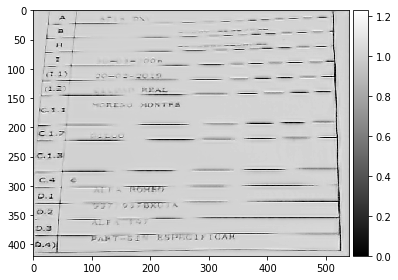

In [ ]:
imshow(np.squeeze(model.predict(sample_img).astype('float32')), cmap='gray')

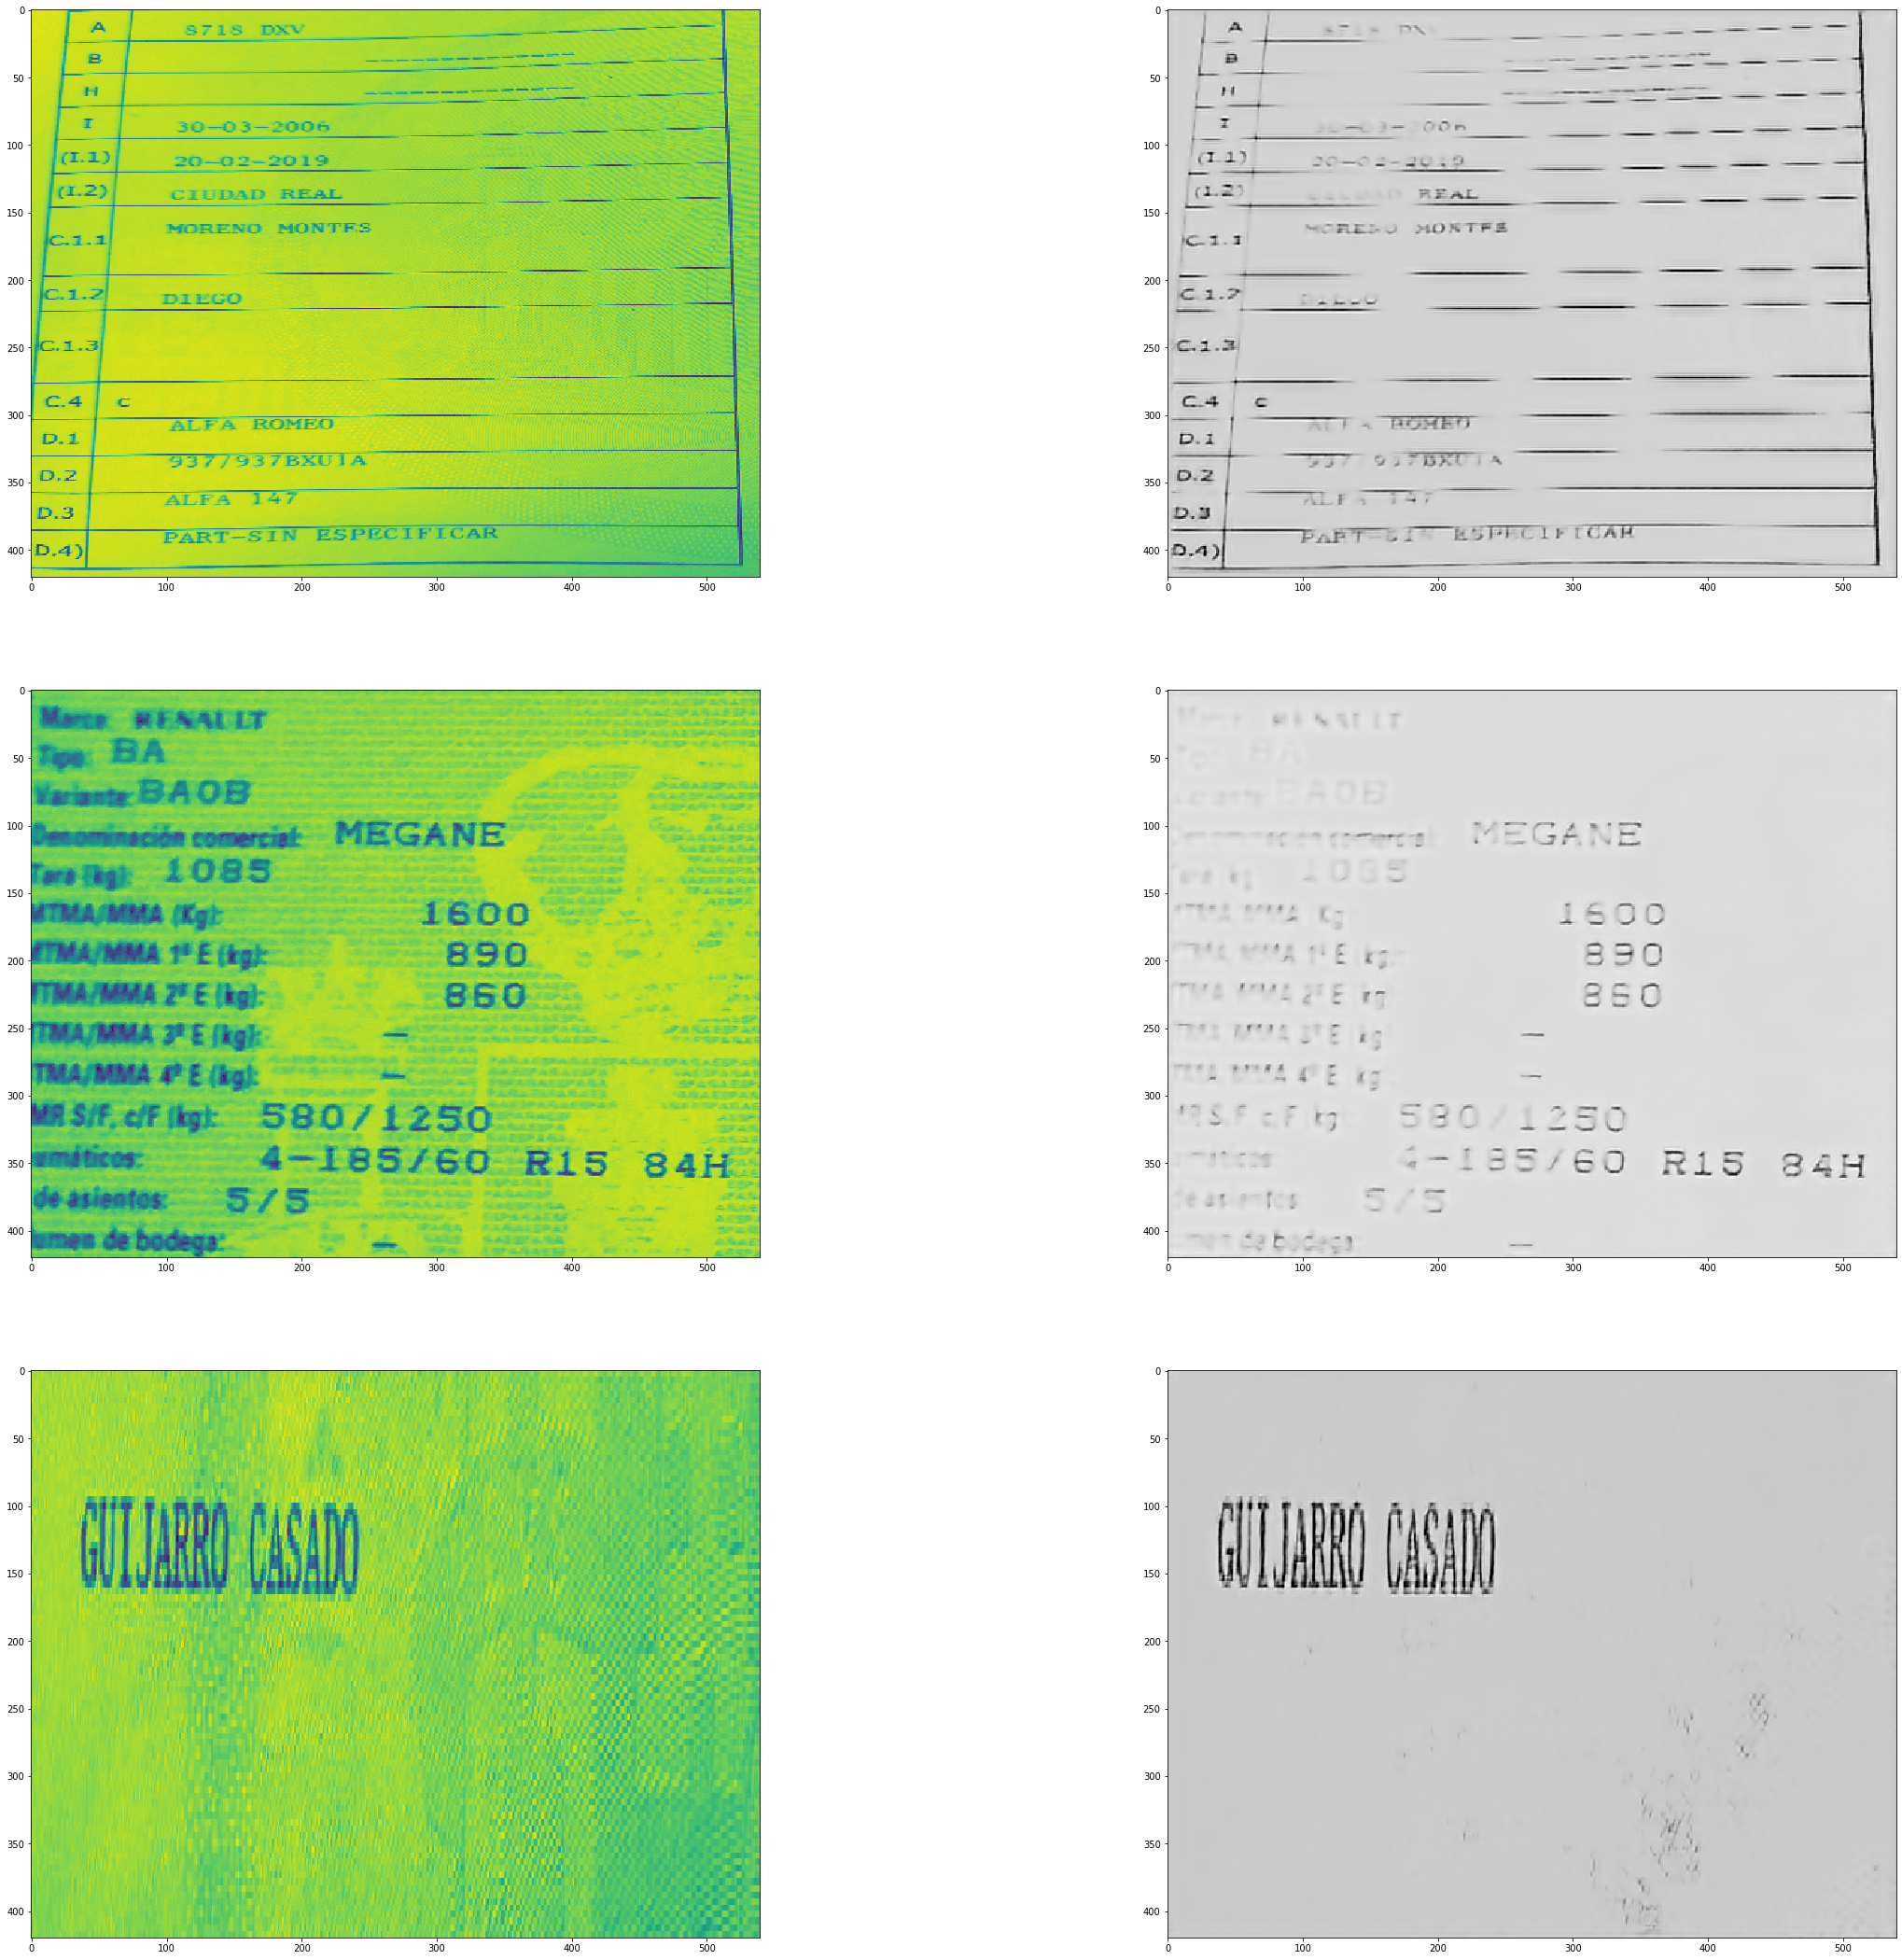

In [ ]:
f, ax = plt.subplots(3,2, figsize=(40,38))
imagen = ['0098.jpg','0145_1.jpg','0062.png']
for i in range(3):
    sample_img2 = load_img(imagen[i], color_mode = "grayscale", target_size=(420,540))
    sample_img = img_to_array(sample_img2)
    sample_img = sample_img.astype('float32')/255.
    sample_img = sample_img.reshape((-1, 420, 540, 1))
    ax[i][0].imshow(sample_img2)
    ax[i][1].imshow(np.squeeze(model.predict(sample_img).astype('float32')), cmap='gray')
plt.show()

In [ ]:
#vgg
 import torch
import torchvision
from torchvision import transforms
from PIL import Image

# Load the VGG-16 model
model = torchvision.models.vgg16(pretrained=True)

# Define a function to extract features from the VGG-16 model
def extract_vgg_features(image):
  """Extracts features from the VGG-16 model.

  Args:
    image: A PIL Image object.

  Returns:
    A tensor containing the extracted features.
  """

  # Preprocess the image
  image = transforms.ToTensor()(image)
  image = image.unsqueeze(0)

  # Extract the features
  features = model.features(image)

  # Return the features
  return features

# Define a function to binarize an image using the VGG-16 features
def binarize_image(image, vgg_features):
  """Binarizes an image using the VGG-16 features.

  Args:
    image: A PIL Image object.
    vgg_features: A tensor containing the VGG-16 features of the image.

  Returns:
    A binarized PIL Image object.
  """

  # Get the average feature value
  avg_feature_value = vgg_features.mean()

  # Binarize the image
  binarized_image = image.copy()
  for x in range(image.width):
    for y in range(image.height):
      pixel_value = image.getpixel((x, y))
      if pixel_value > avg_feature_value:
        binarized_image.putpixel((x, y), 255)
      else:
        binarized_image.putpixel((x, y), 0)

  # Return the binarized image
  return binarized_image

# Load the image
image = Image.open("image.jpg")

# Extract the VGG-16 features
vgg_features = extract_vgg_features(image)

# Binarize the image
binarized_image = binarize_image(image, vgg_features)

# Save the binarized image
binarized_image.save("binarized_image.jpg")